In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/classification_dataset"

if os.path.exists(dataset_path):
    print("✅ Dataset found!")
    print("Classes:", os.listdir(dataset_path))  # List available classes (folders)
else:
    print("❌ Dataset NOT found! Check the path.")


✅ Dataset found!
Classes: ['criminal_dataset', 'side_profile']


In [ ]:
from PIL import Image

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify if it's an actual image
            except Exception as e:
                print(f"❌ Corrupt file found: {file_path} - {e}")

check_images("/content/drive/MyDrive/classification_dataset")


❌ Corrupt file found: /content/drive/MyDrive/classification_dataset/side_profile/B04630.jpg - cannot identify image file '/content/drive/MyDrive/classification_dataset/side_profile/B04630.jpg'
❌ Corrupt file found: /content/drive/MyDrive/classification_dataset/side_profile/B09213.jpg - cannot identify image file '/content/drive/MyDrive/classification_dataset/side_profile/B09213.jpg'
❌ Corrupt file found: /content/drive/MyDrive/classification_dataset/side_profile/B09724.jpg - cannot identify image file '/content/drive/MyDrive/classification_dataset/side_profile/B09724.jpg'
❌ Corrupt file found: /content/drive/MyDrive/classification_dataset/side_profile/B12719.jpg - cannot identify image file '/content/drive/MyDrive/classification_dataset/side_profile/B12719.jpg'
❌ Corrupt file found: /content/drive/MyDrive/classification_dataset/side_profile/B13502.jpg - cannot identify image file '/content/drive/MyDrive/classification_dataset/side_profile/B13502.jpg'
❌ Corrupt file found: /content/driv

In [ ]:
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

for root, _, files in os.walk("/content/drive/MyDrive/classification_dataset"):
    for file in files:
        file_path = os.path.join(root, file)
        if not file.lower().endswith(tuple(valid_extensions)):
            print(f"🗑 Removing non-image file: {file_path}")
            os.remove(file_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size = (128, 128)  # Resize images
batch_size = 32

# Data augmentation & normalization
datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    validation_split=0.2     # 80% training, 20% validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/classification_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (front vs. side)
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/classification_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 3332 images belonging to 2 classes.
Found 831 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increase if needed
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7768 - loss: 0.4471 - val_accuracy: 0.9771 - val_loss: 0.0631
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9744 - loss: 0.0667 - val_accuracy: 0.9819 - val_loss: 0.0563
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9885 - loss: 0.0417 - val_accuracy: 0.9916 - val_loss: 0.0279
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9843 - loss: 0.0409 - val_accuracy: 0.9868 - val_loss: 0.0394
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9894 - loss: 0.0270 - val_accuracy: 0.9832 - val_loss: 0.0562
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9925 - loss: 0.0276 - val_accuracy: 0.9928 - val_loss: 0.0224
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9922 - loss: 0.0222 - val_accuracy: 0.9952 - val_loss: 0.0175
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9971 - loss: 0.0099 - val_accu

In [ ]:
import os
from PIL import Image

def remove_corrupt_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify if it's an actual image
            except Exception as e:
                print(f"🗑 Removing corrupt file: {file_path}")
                os.remove(file_path)  # Delete the corrupt file

dataset_path = "/content/drive/MyDrive/classification_dataset"
remove_corrupt_images(dataset_path)

print("Corrupt images removed successfully!")


Corrupt images removed successfully!


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"🔹 Validation Accuracy: {accuracy * 100:.2f}%")
print(f"🔹 Validation Loss: {loss:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.9892 - loss: 0.0239
🔹 Validation Accuracy: 99.28%
🔹 Validation Loss: 0.0173


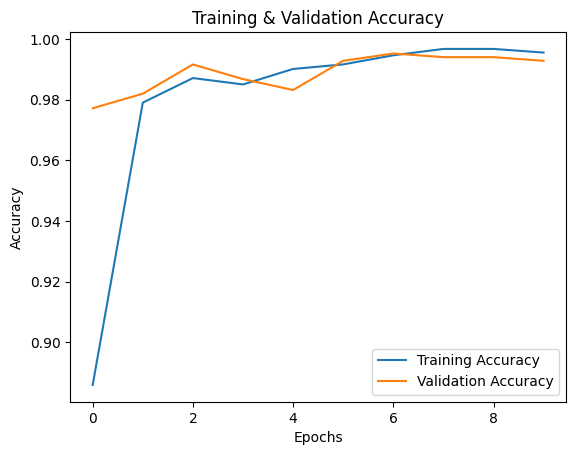

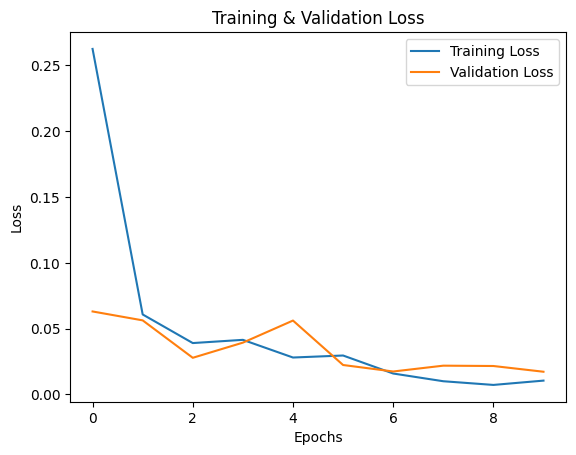

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image from Google Drive
img_path = "/content/drive/MyDrive/test.jpeg"  # Change to your image path
img = image.load_img(img_path, target_size=(128, 128))  # Resize to match model input

# Convert image to array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize (same as training)

# Make a prediction
prediction = model.predict(img_array)
class_labels = list(train_generator.class_indices.keys())  # Get class names
predicted_class = class_labels[int(prediction[0] > 0.5)]  # Threshold 0.5 for binary classification

print(f"🔹 Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
🔹 Predicted Class: criminal_dataset


<ipython-input-10-618c9ce06852>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(prediction[0] > 0.5)]  # Threshold 0.5 for binary classification


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Apply Dropout
    Dense(1, activation='sigmoid')
])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Added
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),  # Added
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),  # Added
    Dense(1, activation='sigmoid')
])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # Increased epochs
    callbacks=[lr_scheduler],  # Added Learning Rate Scheduler
    verbose=1
)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8880 - loss: 2.8012 - val_accuracy: 0.4850 - val_loss: 3.6868 - learning_rate: 0.0010
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9704 - loss: 0.8409 - val_accuracy: 0.4850 - val_loss: 2.3725 - learning_rate: 0.0010
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9724 - loss: 0.7939 - val_accuracy: 0.4850 - val_loss: 1.5703 - learning_rate: 0.0010
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9812 - loss: 0.7665 - val_accuracy: 0.5283 - val_loss: 1.1919 - learning_rate: 0.0010
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9780 - loss: 0.8704 - val_accuracy: 0.9326 - val_loss: 0.9574 - learning_rate: 0.0010
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9739 - loss: 0.8202 - val_accuracy: 0.9832 - val_loss: 0.8265 - learning_rate: 0.0010
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9859 - loss: 0.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
train_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/classification_dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/classification_dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3332 images belonging to 2 classes.
Found 831 images belonging to 2 classes.


In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[lr_scheduler],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.6201 - loss: 3.5833 - val_accuracy: 0.4850 - val_loss: 1.8534 - learning_rate: 0.0010
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7733 - loss: 1.5358 - val_accuracy: 0.6185 - val_loss: 1.7418 - learning_rate: 0.0010
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.7941 - loss: 1.4551 - val_accuracy: 0.7220 - val_loss: 1.5792 - learning_rate: 0.0010
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8005 - loss: 1.4032 - val_accuracy: 0.5439 - val_loss: 1.8283 - learning_rate: 0.0010
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8420 - loss: 1.3768 - val_accuracy: 0.5391 - val_loss: 1.8171 - learning_rate: 0.0010
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8708 - loss: 1.3862
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
105/105 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8708 - loss: 1.386

In [37]:
val_generator.reset()
y_true = val_generator.classes  # True labels
y_pred_prob = model.predict(val_generator)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary (0 or 1)


26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 505ms/step


In [38]:
print(classification_report(y_true, y_pred, target_names=['Front Profile', 'Side Profile']))


               precision    recall  f1-score   support

Front Profile       0.52      0.52      0.52       428
 Side Profile       0.49      0.48      0.49       403

     accuracy                           0.50       831
    macro avg       0.50      0.50      0.50       831
 weighted avg       0.50      0.50      0.50       831



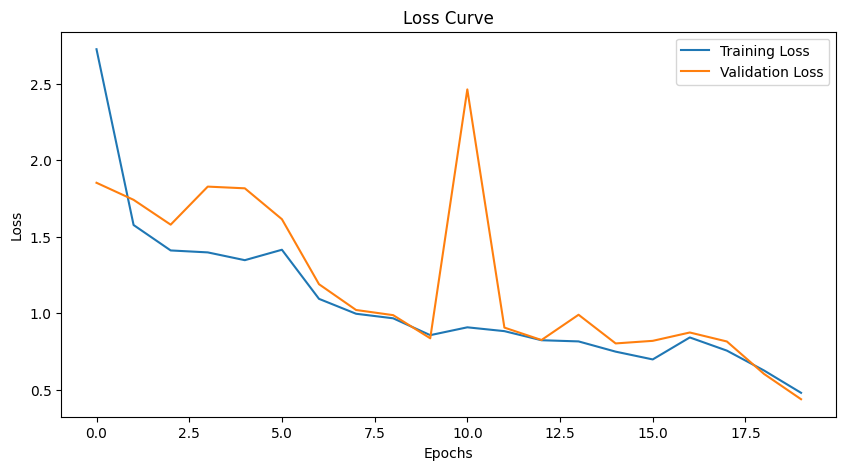

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


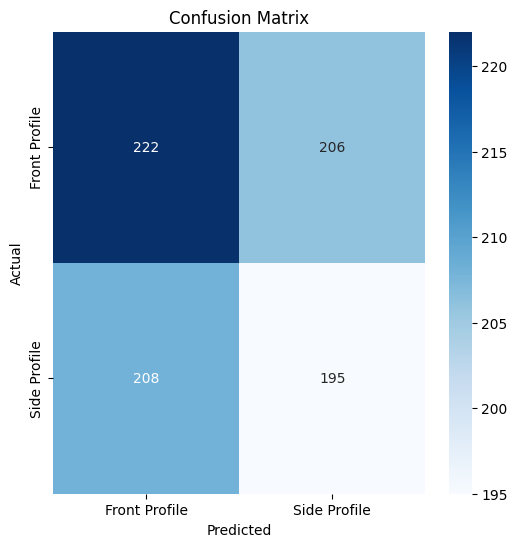

In [40]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Front Profile', 'Side Profile'], yticklabels=['Front Profile', 'Side Profile'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
